## Import Libraries

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
RANDOM_STATE = 42
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the Dataset

In [4]:
df = pd.read_csv("insurance.csv")

In [7]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


there's a skewness in our label, charges.

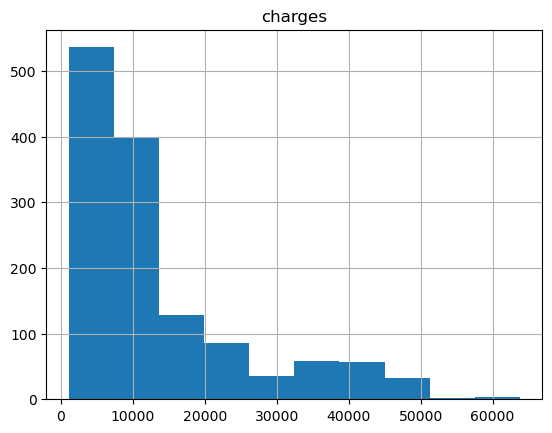

In [12]:
df.hist('charges')
plt.show()

In [13]:
df['log_charges'] = np.log(df['charges'])

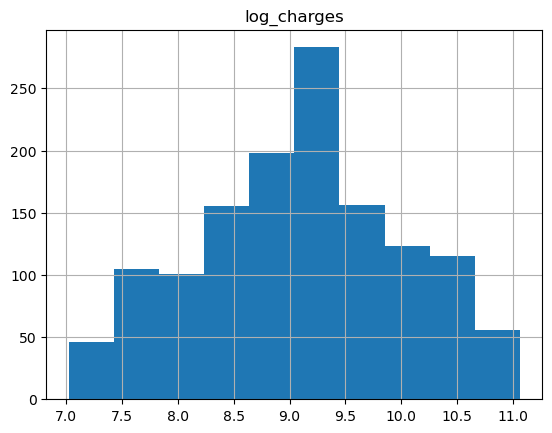

In [15]:
df.hist('log_charges')
plt.show()

In [17]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

Younger people were more common than older people

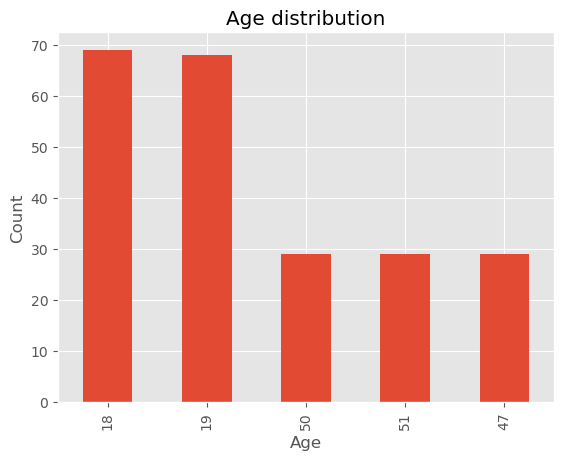

In [18]:
ax = df['age'].value_counts().head().plot(kind = 'bar', title = 'Age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_charges'],
      dtype='object')

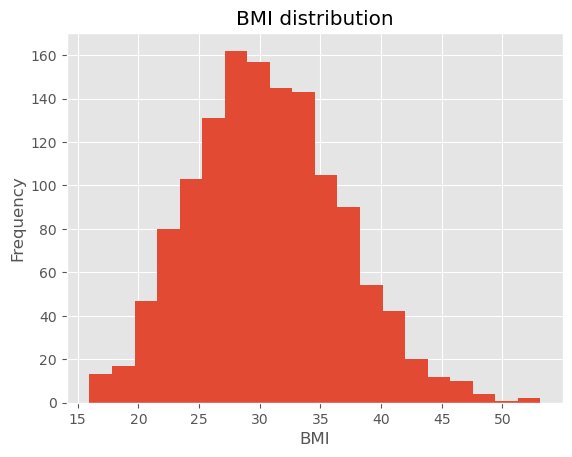

In [21]:
ax = df['bmi'].plot(kind = 'hist', bins = 20, title = 'BMI distribution')
ax.set_xlabel('BMI')
plt.show()

## Feature Relationship

In [23]:
df_corr = df.select_dtypes(['number']).corr()
df_corr
print(df_corr.shape)

(5, 5)


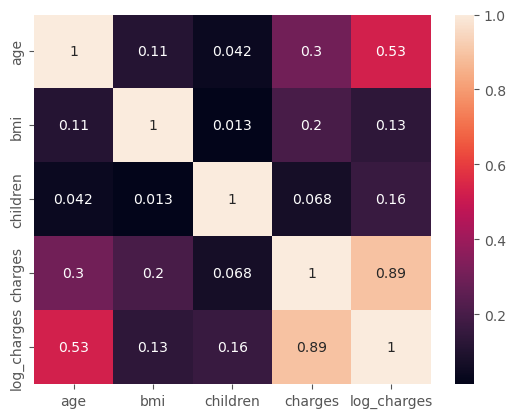

In [25]:
sns.heatmap(df_corr, annot = True)
plt.show()

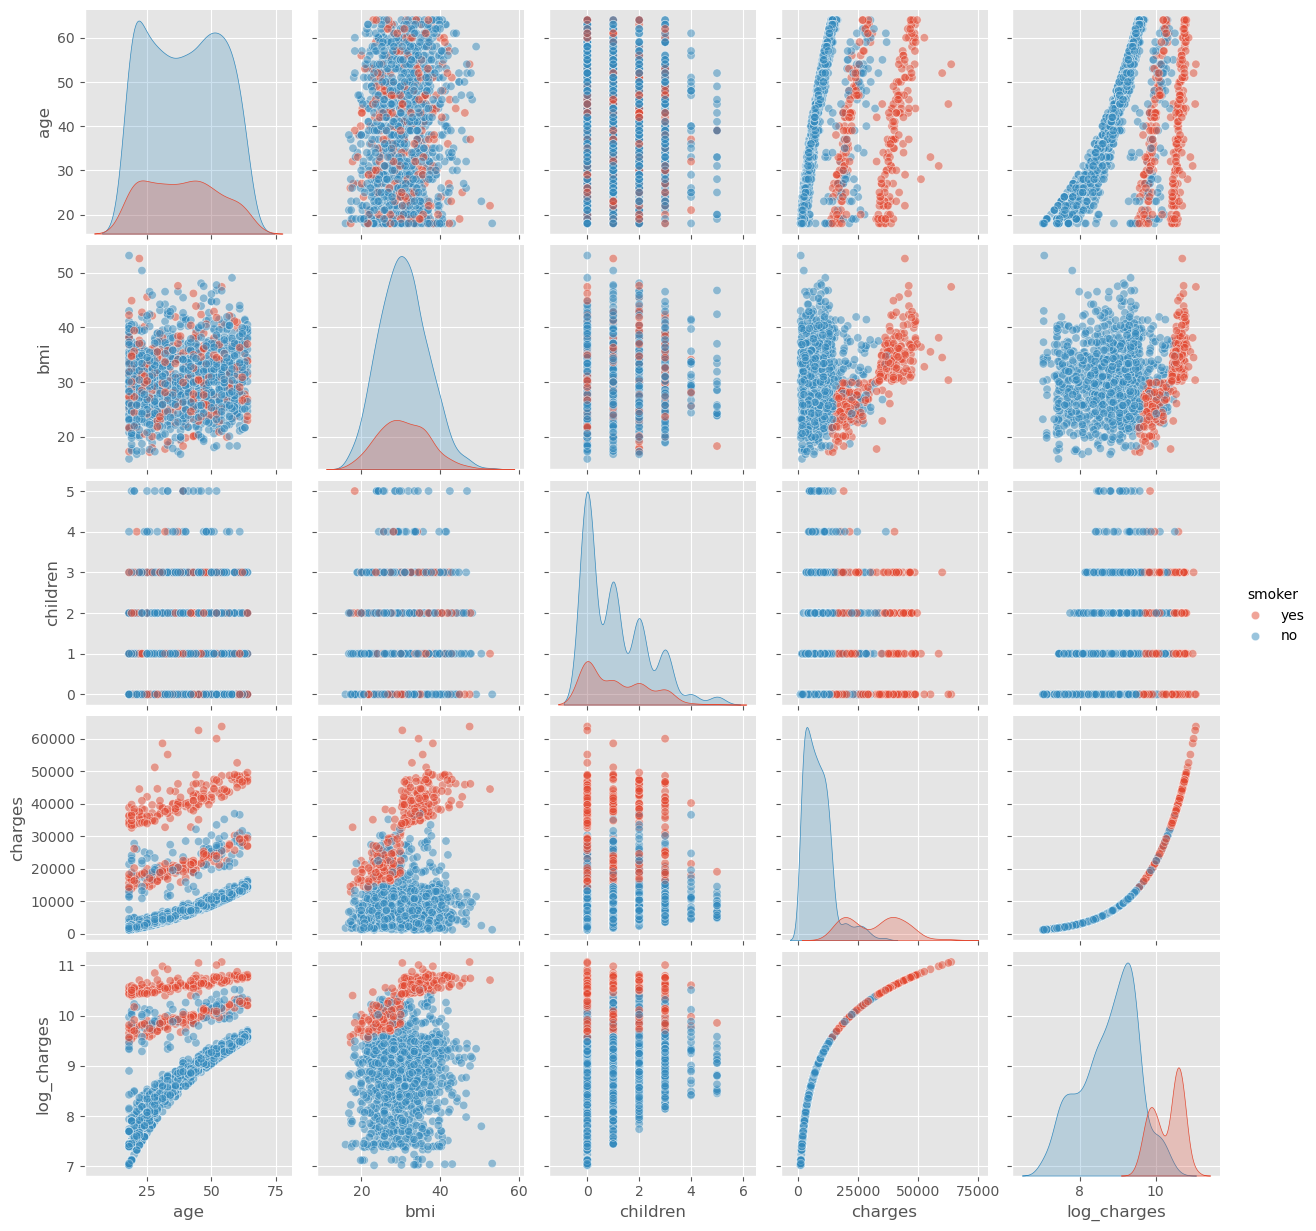

In [30]:
df_numeric = df.select_dtypes(np.number)
sns.pairplot(df, hue = 'smoker', plot_kws={'alpha':0.5})
plt.show()

## Splitting our Data for training

In [31]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_charges'],
      dtype='object')

In [32]:
X = df[['age', 'bmi']]
y = df['log_charges']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = RANDOM_STATE)

## Training our Model

In [38]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.coef_

array([0.03355213, 0.01112555])

In [39]:
df_coefficient = pd.DataFrame(linear_model.coef_, X.columns, columns = ['Coef'])
print(df_coefficient)

         Coef
age  0.033552
bmi  0.011126


### Predicting our values with our training set

In [40]:
y_pred = linear_model.predict(X_train)
print(y_pred)

[8.51435006 8.68032206 9.59876721 ... 9.67203347 9.21692922 9.62394531]


# Evaluation of our Training Set
## Mean Squared Error

In [50]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.60531896254762

In [46]:
train_mse_orig_scale = np.exp2(train_mse)
train_mse_orig_scale

1.5213150605526728

## R2 Score

In [47]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_pred)
train_r2

0.27805734936487236

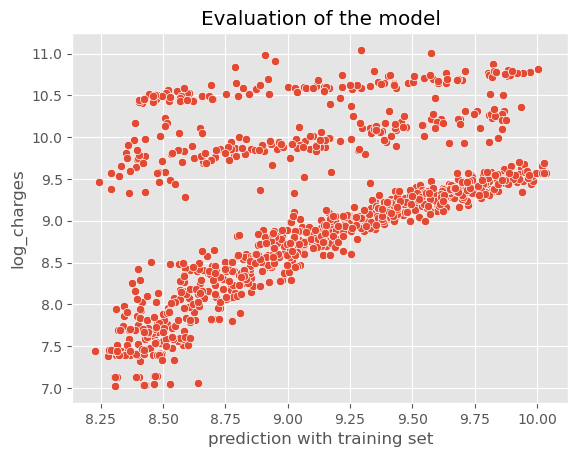

In [51]:
ax = sns.scatterplot (x = y_pred, y = y_train)
plt.xlabel('prediction with training set')
plt.title('Evaluation of the model')
plt.show()

## Our model isn't working
# Training without Smokers

In [53]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_charges'],
      dtype='object')

In [56]:
df_smokers = df[df['smoker'] == 'yes']

In [58]:
df_smokers.head(10)

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.90,0,yes,southwest,16884.92400,9.734176
11,62,female,26.29,0,yes,southeast,27808.72510,10.233105
14,27,male,42.13,0,yes,southeast,39611.75770,10.586881
19,30,male,35.30,0,yes,southwest,36837.46700,10.514271
23,34,female,31.92,1,yes,northeast,37701.87680,10.537465
29,31,male,36.30,2,yes,southwest,38711.00000,10.563879
30,22,male,35.60,0,yes,southwest,35585.57600,10.479696
34,28,male,36.40,1,yes,southwest,51194.55914,10.843389
38,35,male,36.67,1,yes,northeast,39774.27630,10.590976
39,60,male,39.90,0,yes,southwest,48173.36100,10.782561


In [59]:
X_smokers = df_smokers[['age', 'bmi']]
y_smokers = df_smokers['log_charges']
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, test_size = 0.25, random_state=RANDOM_STATE)

In [73]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_smokers)
X_test_poly = poly.transform(X_test_smokers)

In [74]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_smokers)

LinearRegression()

In [75]:
y_pred_poly = poly_model.predict(X_train_poly)

In [83]:
y_pred_poly_test = poly_model.predict(X_test_poly)

## Mean Squared Error and R2 metrics

In [76]:
mse = mean_squared_error(y_train_smokers, y_pred_poly)
mse

0.026125506378503673

In [77]:
r2 = r2_score(y_train_smokers, y_pred_poly)
r2

0.8195492242423671

In [89]:
plot_df_smokers = pd.DataFrame({'predictions':y_pred_poly_test, 'actual': y_test_smokers, 
      'age': X_test_smokers['age'], 'bmi': X_test_smokers['bmi'],
                                     'residuals': y_pred_poly_test - y_test_smokers})

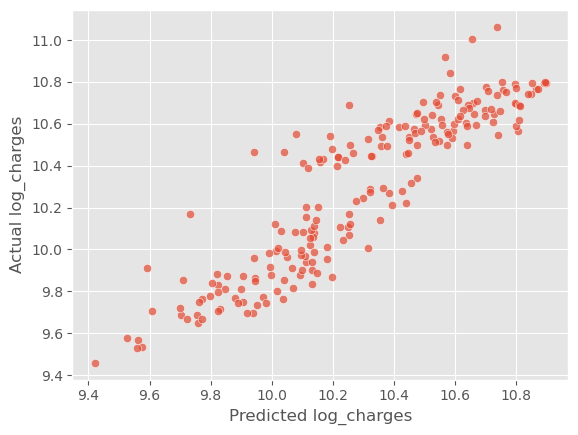

In [79]:
sns.scatterplot(x = 'predictions', y = 'actual', data = plot_df_smokers, alpha = 0.7)
plt.xlabel('Predicted log_charges')
plt.ylabel('Actual log_charges')

plt.show()

## for test

In [86]:
mse = mean_squared_error(y_test_smokers, y_pred_poly_test)
mse

0.03500290441102238

In [87]:
r2 = r2_score(y_test_smokers, y_pred_poly_test)
r2

0.7842144072871078

<Axes: xlabel='predictions', ylabel='residuals'>

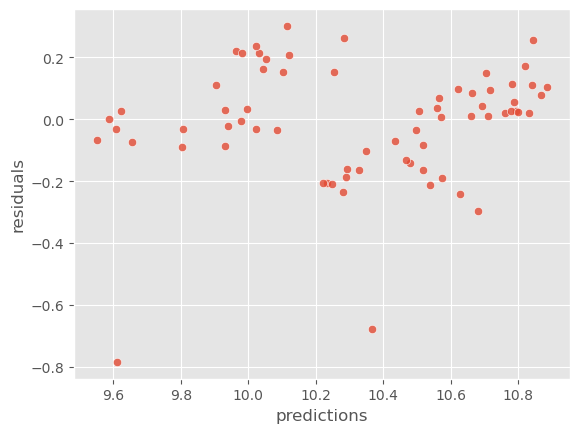

In [90]:
sns.scatterplot(x = "predictions", y = "residuals", data = plot_df_smokers, alpha = 0.8)

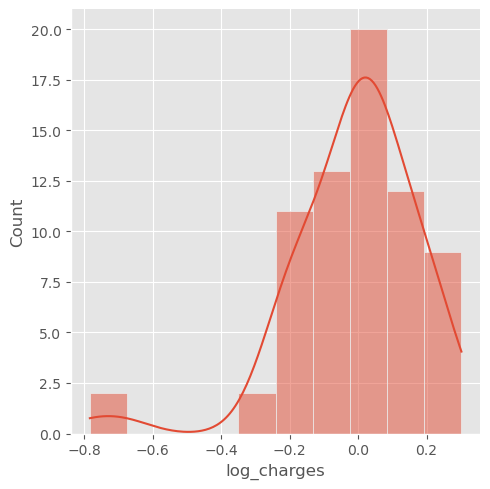

In [93]:
residuals = y_pred_poly_test - y_test_smokers
sns.displot(residuals, bins = 10, kde = True)